In [11]:
import numpy
import pandas as pd
import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score as cv
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

In [22]:
# load data and filiter useless features
data_collector = pd.read_csv("collected_data/data_collector_pub_new.csv")
drop_arr = ['%time','field.ball_imu.header.seq',
            'field.ball_imu.header.stamp',
            'field.ball_imu.header.frame_id',
            'field.ball_imu.orientation_covariance0',
            'field.ball_imu.orientation_covariance1',
            'field.ball_imu.orientation_covariance2',
            'field.ball_imu.orientation_covariance3',
            'field.ball_imu.orientation_covariance4',
            'field.ball_imu.orientation_covariance5',
            'field.ball_imu.orientation_covariance6',
            'field.ball_imu.orientation_covariance7',
            'field.ball_imu.orientation_covariance8',
            'field.ball_imu.angular_velocity_covariance0',
            'field.ball_imu.angular_velocity_covariance1',
            'field.ball_imu.angular_velocity_covariance2',
            'field.ball_imu.angular_velocity_covariance3',
            'field.ball_imu.angular_velocity_covariance4',
            'field.ball_imu.angular_velocity_covariance5',
            'field.ball_imu.angular_velocity_covariance6',
            'field.ball_imu.angular_velocity_covariance7',
            'field.ball_imu.angular_velocity_covariance8',
            'field.ball_imu.linear_acceleration_covariance0',
            'field.ball_imu.linear_acceleration_covariance1',
            'field.ball_imu.linear_acceleration_covariance2',
            'field.ball_imu.linear_acceleration_covariance3',
            'field.ball_imu.linear_acceleration_covariance4',
            'field.ball_imu.linear_acceleration_covariance5',
            'field.ball_imu.linear_acceleration_covariance6',
            'field.ball_imu.linear_acceleration_covariance7',
            'field.ball_imu.linear_acceleration_covariance8',
            'field.ball_force.header.seq',
            'field.ball_force.header.frame_id',
            'field.ball_force.header.stamp',
            'field.ball_odom.header.seq',
            'field.ball_odom.header.stamp',
            'field.ball_odom.header.frame_id',
            'field.ball_odom.child_frame_id',
            'field.ball_odom.pose.covariance0','field.ball_odom.pose.covariance1',
            'field.ball_odom.pose.covariance2','field.ball_odom.pose.covariance3','field.ball_odom.pose.covariance4',
            'field.ball_odom.pose.covariance5','field.ball_odom.pose.covariance6','field.ball_odom.pose.covariance7',
            'field.ball_odom.pose.covariance8','field.ball_odom.pose.covariance9','field.ball_odom.pose.covariance10',
            'field.ball_odom.pose.covariance11','field.ball_odom.pose.covariance12','field.ball_odom.pose.covariance13',
            'field.ball_odom.pose.covariance14','field.ball_odom.pose.covariance15','field.ball_odom.pose.covariance16',
            'field.ball_odom.pose.covariance17','field.ball_odom.pose.covariance18','field.ball_odom.pose.covariance19',
            'field.ball_odom.pose.covariance20','field.ball_odom.pose.covariance21','field.ball_odom.pose.covariance22',
            'field.ball_odom.pose.covariance23','field.ball_odom.pose.covariance24','field.ball_odom.pose.covariance25',
            'field.ball_odom.pose.covariance26',
            'field.ball_odom.pose.covariance27',
            'field.ball_odom.pose.covariance28',
            'field.ball_odom.pose.covariance29',
            'field.ball_odom.pose.covariance30',
            'field.ball_odom.pose.covariance31',
            'field.ball_odom.pose.covariance32',
            'field.ball_odom.pose.covariance33',
            'field.ball_odom.pose.covariance34',
            'field.ball_odom.pose.covariance35',
            
            'field.ball_odom.twist.covariance0','field.ball_odom.twist.covariance1','field.ball_odom.twist.covariance2',
            'field.ball_odom.twist.covariance3','field.ball_odom.twist.covariance4','field.ball_odom.twist.covariance5',
            'field.ball_odom.twist.covariance6','field.ball_odom.twist.covariance7',
            'field.ball_odom.twist.covariance8','field.ball_odom.twist.covariance9','field.ball_odom.twist.covariance10',
            'field.ball_odom.twist.covariance11','field.ball_odom.twist.covariance12','field.ball_odom.twist.covariance13',
            'field.ball_odom.twist.covariance14','field.ball_odom.twist.covariance15','field.ball_odom.twist.covariance16',
            'field.ball_odom.twist.covariance17','field.ball_odom.twist.covariance18','field.ball_odom.twist.covariance19',
            'field.ball_odom.twist.covariance20','field.ball_odom.twist.covariance21','field.ball_odom.twist.covariance22',
            'field.ball_odom.twist.covariance23','field.ball_odom.twist.covariance24','field.ball_odom.twist.covariance25',
            'field.ball_odom.twist.covariance26','field.ball_odom.twist.covariance27','field.ball_odom.twist.covariance28',
            'field.ball_odom.twist.covariance29','field.ball_odom.twist.covariance30','field.ball_odom.twist.covariance31',
            'field.ball_odom.twist.covariance32','field.ball_odom.twist.covariance33','field.ball_odom.twist.covariance34',
            'field.ball_odom.twist.covariance35',
            
            'field.car_odom.header.seq',
            'field.car_odom.header.stamp',
            'field.car_odom.header.frame_id',
            'field.car_odom.child_frame_id',
            
            'field.car_odom.pose.covariance0','field.car_odom.pose.covariance1',
            'field.car_odom.pose.covariance2','field.car_odom.pose.covariance3','field.car_odom.pose.covariance4',
            'field.car_odom.pose.covariance5','field.car_odom.pose.covariance6','field.car_odom.pose.covariance7',
            'field.car_odom.pose.covariance8','field.car_odom.pose.covariance9','field.car_odom.pose.covariance10',
            'field.car_odom.pose.covariance11','field.car_odom.pose.covariance12','field.car_odom.pose.covariance13',
            'field.car_odom.pose.covariance14','field.car_odom.pose.covariance15','field.car_odom.pose.covariance16',
            'field.car_odom.pose.covariance17','field.car_odom.pose.covariance18','field.car_odom.pose.covariance19',
            'field.car_odom.pose.covariance20','field.car_odom.pose.covariance21','field.car_odom.pose.covariance22',
            'field.car_odom.pose.covariance23','field.car_odom.pose.covariance24','field.car_odom.pose.covariance25',
            'field.car_odom.pose.covariance26',
            'field.car_odom.pose.covariance27',
            'field.car_odom.pose.covariance28',
            'field.car_odom.pose.covariance29',
            'field.car_odom.pose.covariance30',
            'field.car_odom.pose.covariance31',
            'field.car_odom.pose.covariance32',
            'field.car_odom.pose.covariance33',
            'field.car_odom.pose.covariance34',
            'field.car_odom.pose.covariance35',
            
            
            'field.car_odom.twist.covariance0','field.car_odom.twist.covariance1','field.car_odom.twist.covariance2',
            'field.car_odom.twist.covariance3','field.car_odom.twist.covariance4','field.car_odom.twist.covariance5',
            'field.car_odom.twist.covariance6','field.car_odom.twist.covariance7',
            'field.car_odom.twist.covariance8','field.car_odom.twist.covariance9','field.car_odom.twist.covariance10',
            'field.car_odom.twist.covariance11','field.car_odom.twist.covariance12','field.car_odom.twist.covariance13',
            'field.car_odom.twist.covariance14','field.car_odom.twist.covariance15','field.car_odom.twist.covariance16',
            'field.car_odom.twist.covariance17','field.car_odom.twist.covariance18','field.car_odom.twist.covariance19',
            'field.car_odom.twist.covariance20','field.car_odom.twist.covariance21','field.car_odom.twist.covariance22',
            'field.car_odom.twist.covariance23','field.car_odom.twist.covariance24','field.car_odom.twist.covariance25',
            'field.car_odom.twist.covariance26','field.car_odom.twist.covariance27','field.car_odom.twist.covariance28',
            'field.car_odom.twist.covariance29','field.car_odom.twist.covariance30','field.car_odom.twist.covariance31',
            'field.car_odom.twist.covariance32','field.car_odom.twist.covariance33','field.car_odom.twist.covariance34',
            'field.car_odom.twist.covariance35',
            'field.car_odom.pose.pose.orientation.z','field.car_odom.pose.pose.position.z','field.car_odom.pose.pose.orientation.x','field.car_odom.pose.pose.orientation.y',
            'field.car_odom.twist.twist.linear.z','field.car_odom.twist.twist.angular.z',
            
            'field.cmd.linear.z',
            'field.ball_odom.pose.pose.position.x','field.ball_odom.pose.pose.position.y','field.ball_odom.pose.pose.position.z',
            'field.ball_odom.pose.pose.orientation.x','field.ball_odom.pose.pose.orientation.y','field.ball_odom.pose.pose.orientation.z','field.ball_odom.pose.pose.orientation.w',
            'field.RelativePosition.orientation.x','field.RelativePosition.orientation.y','field.RelativePosition.orientation.z','field.RelativePosition.orientation.w',
            'field.theta.data','field.ball_imu.orientation.x','field.ball_imu.orientation.y','field.ball_imu.orientation.z','field.ball_imu.orientation.w',
            
            'field.ball_force.wrench.force.x','field.ball_force.wrench.force.y','field.ball_force.wrench.force.z',
            
            'field.ball_odom.pose.pose.position.x','field.ball_odom.pose.pose.position.y','field.ball_odom.pose.pose.position.z',
            'field.ball_odom.pose.pose.orientation.x','field.ball_odom.pose.pose.orientation.y','field.ball_odom.pose.pose.orientation.z','field.ball_odom.pose.pose.orientation.w',
            'field.ball_force.wrench.force.x','field.ball_force.wrench.force.y','field.ball_force.wrench.force.z',
            'field.car_odom.pose.pose.position.x','field.car_odom.pose.pose.position.y','field.car_odom.pose.pose.position.z','field.car_odom.pose.pose.orientation.w'
            
                   
]

pd.options.display.max_columns = None
data_collector = data_collector.drop(drop_arr,axis=1)

In [23]:
#Global Variables
MASS_OF_BALL = 1
MASS_OF_ROBOT = 1.59691

ACCLEARATION_OF_BALL = 0
ACCLEARATION_OF_CAR = 0


In [24]:
def kineticEnergy(mass,vel):
    return 0.5*mass*(vel**2)
def poentitalEnergy(mass,height):
    return mass*9.8*height

In [25]:
# calculate relative vel of ball; kinetic energy; potential energy;  Total Energy of the Ball
rel_vel_x_list = []
rel_vel_y_list = []
rel_vel_z_list = []
KINETIC_ENERGY_OF_BALL = []
POTENTIAL_ENERGY_OF_BALL = []
ENERGY_OF_BALL = []
for index, row in data_collector.iterrows():
    rel_vel_x = row['field.ball_odom.twist.twist.linear.x'] - row['field.car_odom.twist.twist.linear.x']
    rel_vel_y = row['field.ball_odom.twist.twist.linear.y'] - row['field.car_odom.twist.twist.linear.y']
    rel_vel_z = row['field.ball_odom.twist.twist.linear.z']
    vel = np.sqrt(rel_vel_x**2+rel_vel_y**2+rel_vel_z**2)
    
    height = row['field.RelativePosition.position.z']
    kineticEnergy_ball = kineticEnergy(MASS_OF_BALL,vel)
    poentitalEnergy_ball = poentitalEnergy(MASS_OF_BALL,height)
    
    accleration  = np.sqrt(row['field.ball_imu.linear_acceleration.x']**2+row['field.ball_imu.linear_acceleration.y']**2+row['field.ball_imu.linear_acceleration.z']**2)
    print("index:{} ".format(str(index))+"Energy:{}".format(str(poentitalEnergy_ball+kineticEnergy_ball)))
    
    
    rel_vel_x_list.append(rel_vel_x)
    rel_vel_y_list.append(rel_vel_y)
    rel_vel_z_list.append(rel_vel_z)
    KINETIC_ENERGY_OF_BALL.append(kineticEnergy_ball)
    POTENTIAL_ENERGY_OF_BALL.append(poentitalEnergy_ball)
    ENERGY_OF_BALL.append(poentitalEnergy_ball+kineticEnergy_ball)
    

index:0 Energy:0.2918736467939101
index:1 Energy:0.29152514998773393
index:2 Energy:0.2915689622394654
index:3 Energy:0.2916461414738522
index:4 Energy:0.2916401574062591
index:5 Energy:0.29132975595704674
index:6 Energy:0.29136173031626267
index:7 Energy:0.29119525941366575
index:8 Energy:0.2913289962239691
index:9 Energy:0.2912953506137251
index:10 Energy:0.2911369119958422
index:11 Energy:0.2908266889287483
index:12 Energy:0.2911823393310593
index:13 Energy:0.29134408621630603
index:14 Energy:0.2911728113053342
index:15 Energy:0.29114618788985014
index:16 Energy:0.2909028934005346
index:17 Energy:0.29135132403126507
index:18 Energy:0.29135605657474356
index:19 Energy:0.2915215339365145
index:20 Energy:0.291375741092312
index:21 Energy:0.29139573580751743
index:22 Energy:0.2913288772598413
index:23 Energy:0.2913353966489
index:24 Energy:0.2913079369794594
index:25 Energy:0.2913624627500219
index:26 Energy:0.2913196076806425
index:27 Energy:0.2912829437576443
index:28 Energy:0.2913342

index:1648 Energy:0.3734250030036338
index:1649 Energy:0.3596270288564298
index:1650 Energy:0.364564973543433
index:1651 Energy:0.364651931067694
index:1652 Energy:0.3646918668497804
index:1653 Energy:0.37253741067662993
index:1654 Energy:0.378797864927162
index:1655 Energy:0.34439312697664193
index:1656 Energy:0.3391965008795951
index:1657 Energy:0.3277575010908816
index:1658 Energy:0.33150986215496964
index:1659 Energy:0.32915052636901965
index:1660 Energy:0.32816249453276847
index:1661 Energy:0.3236786387323231
index:1662 Energy:0.32257350039705085
index:1663 Energy:0.32162846949342266
index:1664 Energy:0.32226592894394607
index:1665 Energy:0.31596000818637376
index:1666 Energy:0.31199488391500685
index:1667 Energy:0.31535739479586367
index:1668 Energy:0.31506503778421835
index:1669 Energy:0.31528887717048387
index:1670 Energy:0.3151289695878693
index:1671 Energy:0.31650774208375276
index:1672 Energy:0.3156245026902574
index:1673 Energy:0.3166465540993799
index:1674 Energy:0.3245995

index:3238 Energy:0.7365116456622497
index:3239 Energy:0.7169007278704764
index:3240 Energy:0.6528349602474006
index:3241 Energy:0.6425935718429032
index:3242 Energy:0.5700033282810253
index:3243 Energy:0.5426867439432141
index:3244 Energy:0.509313639051322
index:3245 Energy:0.4980425301817899
index:3246 Energy:0.4662130017932764
index:3247 Energy:0.4564130876395824
index:3248 Energy:0.4356679819424524
index:3249 Energy:0.40374148859589215
index:3250 Energy:0.3960643982454032
index:3251 Energy:0.3922735066043156
index:3252 Energy:0.3865795556110377
index:3253 Energy:0.3848055969410394
index:3254 Energy:0.380465535900745
index:3255 Energy:0.38033612556508856
index:3256 Energy:0.3809999812485603
index:3257 Energy:0.41809467395925803
index:3258 Energy:0.4340568600891538
index:3259 Energy:0.44098716349252387
index:3260 Energy:0.45946445709942246
index:3261 Energy:0.4672185125842855
index:3262 Energy:0.4920173134290432
index:3263 Energy:0.5022249071281384
index:3264 Energy:0.527110336637915

In [26]:
processed_data = pd.DataFrame()

#state of car
processed_data['car.twist.twist.linear.x'] = data_collector['field.car_odom.twist.twist.linear.x']
processed_data['car.twist.twist.angular.x'] = data_collector['field.car_odom.twist.twist.angular.x']
processed_data['car.twist.twist.angular.y'] = data_collector['field.car_odom.twist.twist.angular.x']


#state of ball
processed_data['ball.RelativePosition.position.x'] = data_collector['field.RelativePosition.position.x']
processed_data['ball.RelativePosition.position.y'] = data_collector['field.RelativePosition.position.y']
processed_data['ball.RelativePosition.position.z'] = data_collector['field.RelativePosition.position.z']

processed_data['ball.angular_velocity.x'] = data_collector['field.ball_imu.angular_velocity.x']
processed_data['ball.angular_velocity.y'] = data_collector['field.ball_imu.angular_velocity.y']
processed_data['ball.angular_velocity.z'] = data_collector['field.ball_imu.angular_velocity.z']

processed_data['ball.linear_z`.x'] = data_collector['field.ball_imu.linear_acceleration.x']
processed_data['ball.linear_acceleration.y'] = data_collector['field.ball_imu.linear_acceleration.y']
processed_data['ball.linear_acceleration.z'] = data_collector['field.ball_imu.linear_acceleration.z']

processed_data['ball.RelativeVel.x'] = rel_vel_x_list
processed_data['ball.RelativeVel.y'] = rel_vel_y_list
processed_data['ball.RelativeVel.z'] = rel_vel_z_list

#processed_data['ball.kineticEnergy'] = KINETIC_ENERGY_OF_BALL
#processed_data['ball.potentialEnergy'] = POTENTIAL_ENERGY_OF_BALL
processed_data['ball.EnergySum'] = ENERGY_OF_BALL

#control signal
processed_data['controlSignal.cmd.linear.x'] = data_collector['field.cmd.linear.x']
processed_data['controlSignal.cmd.angular.z'] = data_collector['field.cmd.angular.z']


#19 features

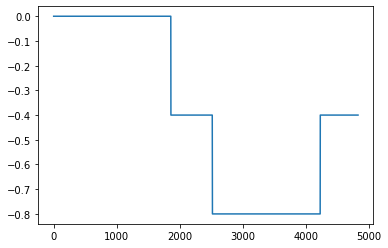

In [27]:
plt.plot(processed_data['controlSignal.cmd.angular.z'])

In [28]:
processed_data.to_csv('processed_data_new.csv')

In [29]:
processed_data

,car.twist.twist.linear.x,car.twist.twist.angular.x,car.twist.twist.angular.y,ball.RelativePosition.position.x,ball.RelativePosition.position.y,ball.RelativePosition.position.z,ball.angular_velocity.x,ball.angular_velocity.y,ball.angular_velocity.z,ball.linear_z`.x,ball.linear_acceleration.y,ball.linear_acceleration.z,ball.RelativeVel.x,ball.RelativeVel.y,ball.RelativeVel.z,ball.EnergySum,controlSignal.cmd.linear.x,controlSignal.cmd.angular.z
0,-8.195177e-11,0.0,0.0,-0.007664,-0.001917,0.029751,0.891343,-0.716718,0.274836,0.233189,-0.137029,0.046568,-0.007439,-0.023721,0.001462,0.291874,0.0,0.0
1,-1.490903e-11,0.0,0.0,-0.006925,-0.003158,0.029717,1.742308,-0.270660,0.532900,-0.045458,-0.096652,-0.079592,0.014911,-0.019277,-0.000426,0.291525,0.0,0.0
2,-3.062276e-11,0.0,0.0,-0.006594,-0.003593,0.029716,1.754438,-0.248829,0.488107,0.114843,0.041439,-0.001954,0.016276,-0.020942,-0.000300,0.291569,0.0,0.0
3,-5.304843e-11,0.0,0.0,-0.006430,-0.003794,0.029722,1.643143,-0.196061,0.446174,0.079750,0.167886,0.023814,0.016566,-0.021471,0.000450,0.291646,0.0,0.0
4,-2.970751e-11,0.0,0.0,-0.005939,-0.004313,0.029725,1.640408,0.046575,0.436421,0.139253,-0.140842,-0.045735,0.016355,-0.019822,0.000780,0.291640,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,2.503413e+00,0.0,0.0,0.033829,0.018717,0.030711,6.384406,4.390289,-0.136035,-2.084708,3.693499,4.792496,-0.115084,-0.487098,-0.011216,0.426289,2.5,-0.4
4820,2.503496e+00,0.0,0.0,0.030752,0.015526,0.030353,6.343227,3.710250,2.842042,-0.407117,-0.066243,1.575418,-0.118124,-0.493397,-0.005710,0.426176,2.5,-0.4
4821,2.503617e+00,0.0,0.0,0.029915,0.014742,0.030228,6.297514,3.467679,3.511743,-4.616136,3.169095,4.029902,-0.136827,-0.525191,-0.001937,0.443508,2.5,-0.4
4822,2.503601e+00,0.0,0.0,0.026437,0.011887,0.029978,4.472668,1.916776,5.976702,0.210677,0.141740,0.738990,-0.138923,-0.529932,-0.003718,0.443852,2.5,-0.4
